<a href="https://colab.research.google.com/github/DiwakarBasnet/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Problem:</b> There is a car manufacturer company that has manufactured a new SUV car. Using K-NN algorithm classify users that will buy the SUV and that won't buy.

# Data Pre-processing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing dataset
data_set = pd.read_csv('suv_data.csv')

### Visualizing the dataset

In [2]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Gender, Age and EstimatedSalary are independent variables and Purchased is dependent variable.

In [3]:
data_set.shape

(400, 5)

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Extracting independent and dependent variables
X = data_set.iloc[:, 2:4].values
y = data_set.iloc[:, 4].values

In [6]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [7]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# 75% training set and 25% test set

# Fitting K-NN Algorithm to training data
To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The parameter of this class are:
- <b>n_neighbors:</b> To define the required neighbors of the algorithm. Usually it takes 5.
- <b>metric = 'minkowski':</b> This is the default parameter and it decides the distance between the points.
- <b>p = 2:</b> It is equivalent to the standard Euclidean metric.

In [8]:
# Fitting KNN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting the test result

In [9]:
y_pred = classifier.predict(X_test)

# Test accuracy of result

In [10]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

There are 64 + 29 = 93 correct predictions and 3 + 4 = 7 incorrect predictions.

# Visualizing the data

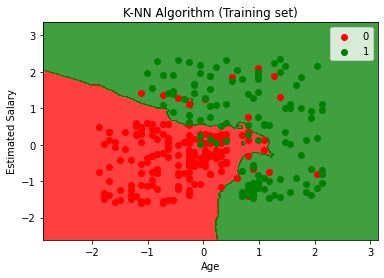

In [12]:
# Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                     np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_train)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

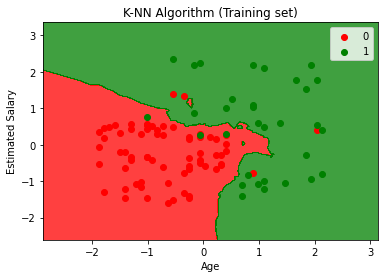

In [13]:
# Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                     np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_train)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()